## Importing Dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('regression.csv')
df

,X,Y
0,1,3
1,2,4
2,3,8
3,4,4
4,5,6
5,6,9
6,7,8
7,8,12
8,9,15
9,10,26


In [3]:
X = df.iloc[:, :-1].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20]], dtype=int64)

In [4]:
y = df.iloc[:, -1].values
y

array([ 3,  4,  8,  4,  6,  9,  8, 12, 15, 26, 35, 40, 45, 54, 49, 59, 60,
       62, 63, 68], dtype=int64)

## Dataset Visualization

In [5]:
import matplotlib.pyplot as plt

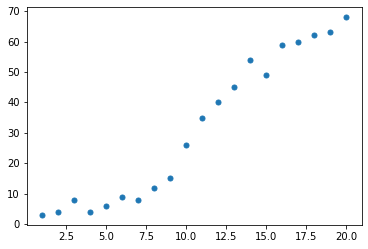

In [6]:
plt.scatter(X, y, s=25)
plt.show()

## Splitting Dataset: Training Set & Test Set

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [9]:
X_train

array([[ 3],
       [15],
       [ 5],
       [18],
       [ 8],
       [ 2],
       [14],
       [ 1],
       [20],
       [19],
       [10],
       [16],
       [ 9],
       [13],
       [12],
       [ 6]], dtype=int64)

In [10]:
X_test

array([[ 4],
       [17],
       [ 7],
       [11]], dtype=int64)

In [11]:
y_train

array([ 8, 49,  6, 62, 12,  4, 54,  3, 68, 63, 26, 59, 15, 45, 40,  9],
      dtype=int64)

In [12]:
y_test

array([ 4, 60,  8, 35], dtype=int64)

## Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [14]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(np.array(y_train).reshape(-1, 1))
y_test = sc_y.transform(np.array(y_test).reshape(-1, 1))

In [15]:
X_train

array([[-1.29088069],
       [ 0.72415258],
       [-0.95504181],
       [ 1.2279109 ],
       [-0.45128349],
       [-1.45880013],
       [ 0.55623314],
       [-1.62671957],
       [ 1.56374978],
       [ 1.39583034],
       [-0.11544461],
       [ 0.89207202],
       [-0.28336405],
       [ 0.3883137 ],
       [ 0.22039426],
       [-0.78712237]])

In [16]:
X_test

array([[-1.12296125],
       [ 1.05999146],
       [-0.61920293],
       [ 0.05247482]])

In [17]:
y_train = y_train.flatten()
y_train

array([-1.04002481,  0.68720627, -1.12427999,  1.2348649 , -0.87151446,
       -1.20853516,  0.89784421, -1.25066275,  1.48763043,  1.27699249,
       -0.28172824,  1.10848214, -0.7451317 ,  0.51869592,  0.30805798,
       -0.99789723])

In [18]:
y_test = y_test.flatten()
y_test

array([-1.20853516,  1.15060973, -1.04002481,  0.09742005])

## Training Model

In [19]:
from sklearn.svm import SVR

In [20]:
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

SVR()

## Model Visualization

In [21]:
X_vis = sc_x.transform(X)
X_vis

array([[-1.62671957],
       [-1.45880013],
       [-1.29088069],
       [-1.12296125],
       [-0.95504181],
       [-0.78712237],
       [-0.61920293],
       [-0.45128349],
       [-0.28336405],
       [-0.11544461],
       [ 0.05247482],
       [ 0.22039426],
       [ 0.3883137 ],
       [ 0.55623314],
       [ 0.72415258],
       [ 0.89207202],
       [ 1.05999146],
       [ 1.2279109 ],
       [ 1.39583034],
       [ 1.56374978]])

In [22]:
y_vis_dat = sc_y.transform(np.array(y).reshape(-1, 1))
y_vis_dat = y_vis_dat.flatten()
y_vis_dat

array([-1.25066275, -1.20853516, -1.04002481, -1.20853516, -1.12427999,
       -0.99789723, -1.04002481, -0.87151446, -0.7451317 , -0.28172824,
        0.09742005,  0.30805798,  0.51869592,  0.89784421,  0.68720627,
        1.10848214,  1.15060973,  1.2348649 ,  1.27699249,  1.48763043])

In [23]:
y_vis_pred = model.predict(X_vis)
y_vis_pred

array([-1.07789136, -1.12300806, -1.14025507, -1.13180666, -1.0969121 ,
       -1.03042626, -0.92424592, -0.77130227, -0.57028758, -0.32870323,
       -0.06252839,  0.20750336,  0.46129215,  0.68389803,  0.86726841,
        1.00884278,  1.10838484,  1.16517427,  1.17720463,  1.14267072])

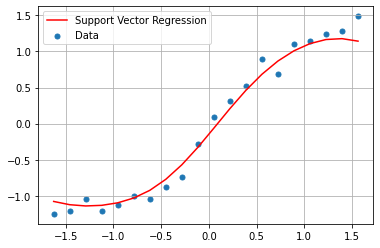

In [24]:
plt.scatter(X_vis, y_vis_dat, s=25, label='Data')
plt.plot(X_vis, y_vis_pred, '-r', label='Support Vector Regression')

plt.legend()
plt.grid()
plt.show()

## Model Evaluation

In [25]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [26]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(rmse)
print(r2)

0.10800284479159343
0.987129898074437
